In [43]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [1]:
GUNN = "Gunn"
FLESCH = "Fletch"
key = "Key"

In [2]:
def file_to_dict(filename):
    with open(filename, 'r') as f:
        for line in f:
            yield json.loads(line)

In [51]:
filename = "../data/read_skyrim.dat"
subs = list(file_to_dict(filename))

In [52]:
flesch = np.array([sub[FLESCH] for sub in subs if not np.math.isnan(sub[FLESCH])], dtype=float)
fletch_hist = np.histogram(flesch, np.arange(np.math.floor(flesch.min()), np.math.ceil(flesch.max())))
plt.figure(figsize=(10, 10))
plt.hist(flesch, bins=np.arange(max(np.math.floor(flesch.min()), -100), np.math.ceil(flesch.max())))
plt.title("Flesch–Kincaid Grade for r/askreddit")
plt.show()

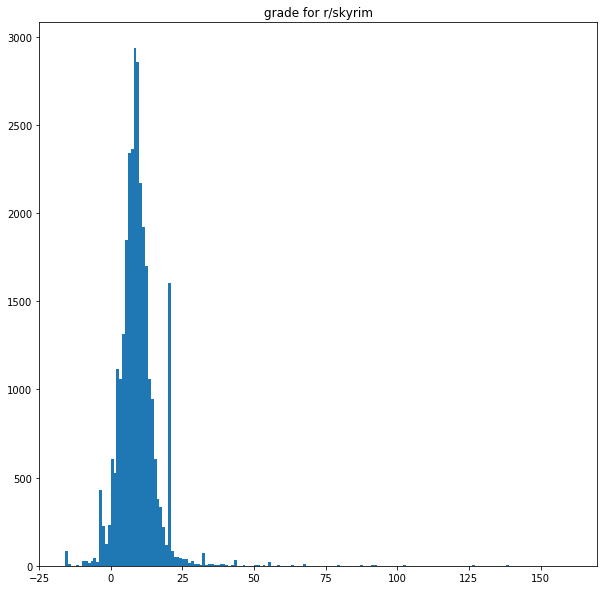

In [77]:
gunn = np.array([sub[GUNN] for sub in subs if not np.math.isnan(sub[GUNN])], dtype=float)
gunn_hist = np.histogram(gunn, np.arange(np.math.floor(gunn.min()), np.math.ceil(gunn.max())))
plt.figure(figsize=(10, 10))
plt.title("Gunning Fog Grade for r/askreddit")
plt.hist(grade, bins=np.arange(max(np.math.floor(grade.min()), -100), np.math.ceil(grade.max())))
plt.show()